In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

# make sure that pandas datatype can be used in matplotlib plots without casting
register_matplotlib_converters()

# graphics customization
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 1.5
darkgrey = '#3A3A3A'
lightgrey = '#414141'
barblue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
plt.rcParams['text.color'] = darkgrey
plt.rcParams['axes.labelcolor'] = darkgrey
plt.rcParams['xtick.color'] = lightgrey
plt.rcParams['ytick.color'] = lightgrey



In [2]:
kanban_data = pd.read_csv("MK_data.csv",usecols=['Done', 'Type'], parse_dates=['Done']).dropna()
kanban_data.head(1)

,Done,Type
0,2023-09-26,Story


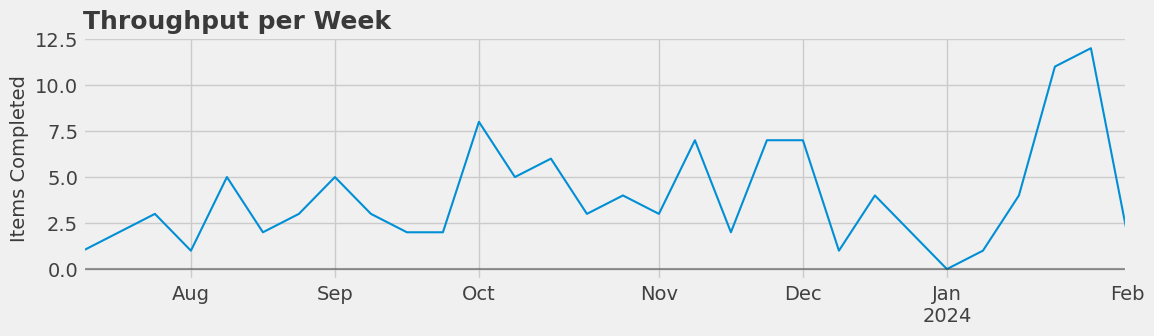

In [10]:
# Мы суммируем выполненные работы за день (TASK+BUG+STORY)
# и выводим данные о производительности за день
# чтобы получить краткий обзор результата.
throughput = pd.crosstab(
    kanban_data.Done, kanban_data.Type, colnames=[None]).reset_index()
throughput['Throughput'] = throughput.Bug + throughput.Story + throughput.Task
date_range = pd.date_range(
    start=throughput.Done.min(), end=throughput.Done.max())
throughput = throughput.set_index('Done').reindex(
    date_range).fillna(0).astype(int).rename_axis('Date')
throughput_per_week = pd.DataFrame(
    throughput['Throughput'].resample('W-Mon').sum()).reset_index()
ax = throughput_per_week.plot(
    x='Date', y='Throughput', linewidth=1.5, figsize=(12, 3), legend=None)
ax.set_title("Throughput per Week", loc='left', fontdict={
             'fontsize': 18, 'fontweight': 'semibold'})
ax.set_xlabel('')
ax.set_ylabel('Items Completed')
ax.axhline(y=0, color=lightgrey, alpha=.5)